# Vehicle Speed Detection and Analysis using DAS (Distributed Acoustic Sensing)

This project uses DAS data to detect vehicle trajectories in space-time diagrams and calculate their speeds in km/h.

## Dataset

Download the DAS dataset from Google Drive: [dataset.zip](https://drive.google.com/file/d/1lJKLz3LsQmnAf9q5GGi6arEYBz-3CMhx/view?usp=sharing)

Extract the `.npy` files into a `dataset/` folder, in the same folder as the jupyter file.

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

### **Load Data**

### 1st Range : 090422 - 090612

In [4]:
pattern = os.path.join("dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [5]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)

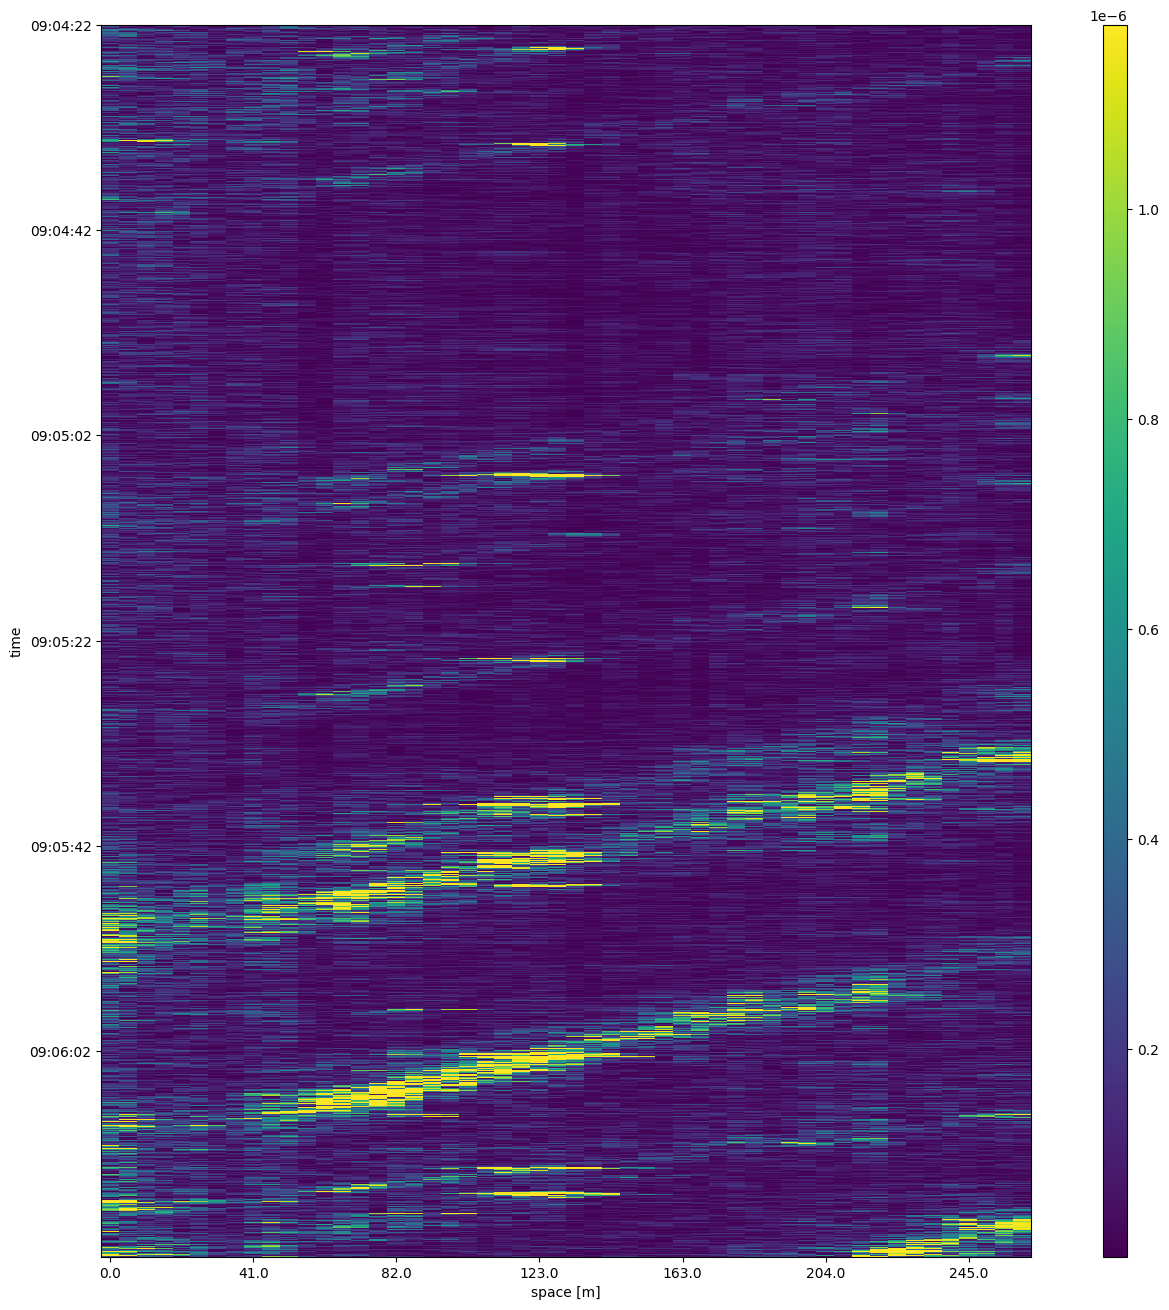

In [ ]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 091152 - 091342

In [8]:
start = '091152'
end = '091342'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [9]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)

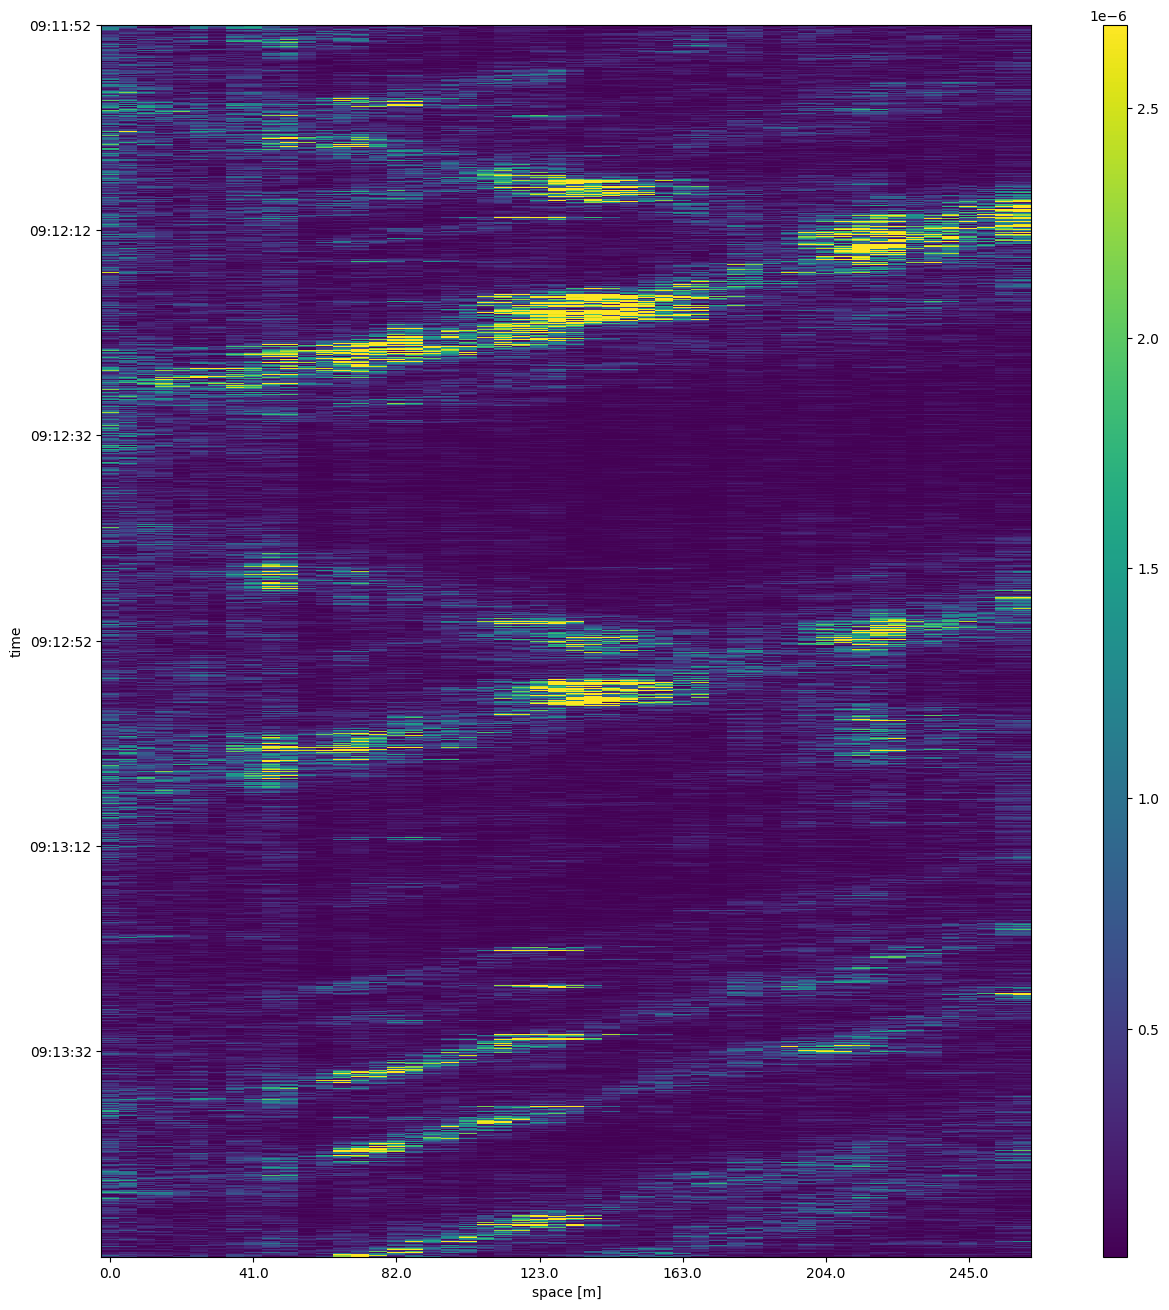

In [10]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [11]:
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [12]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)

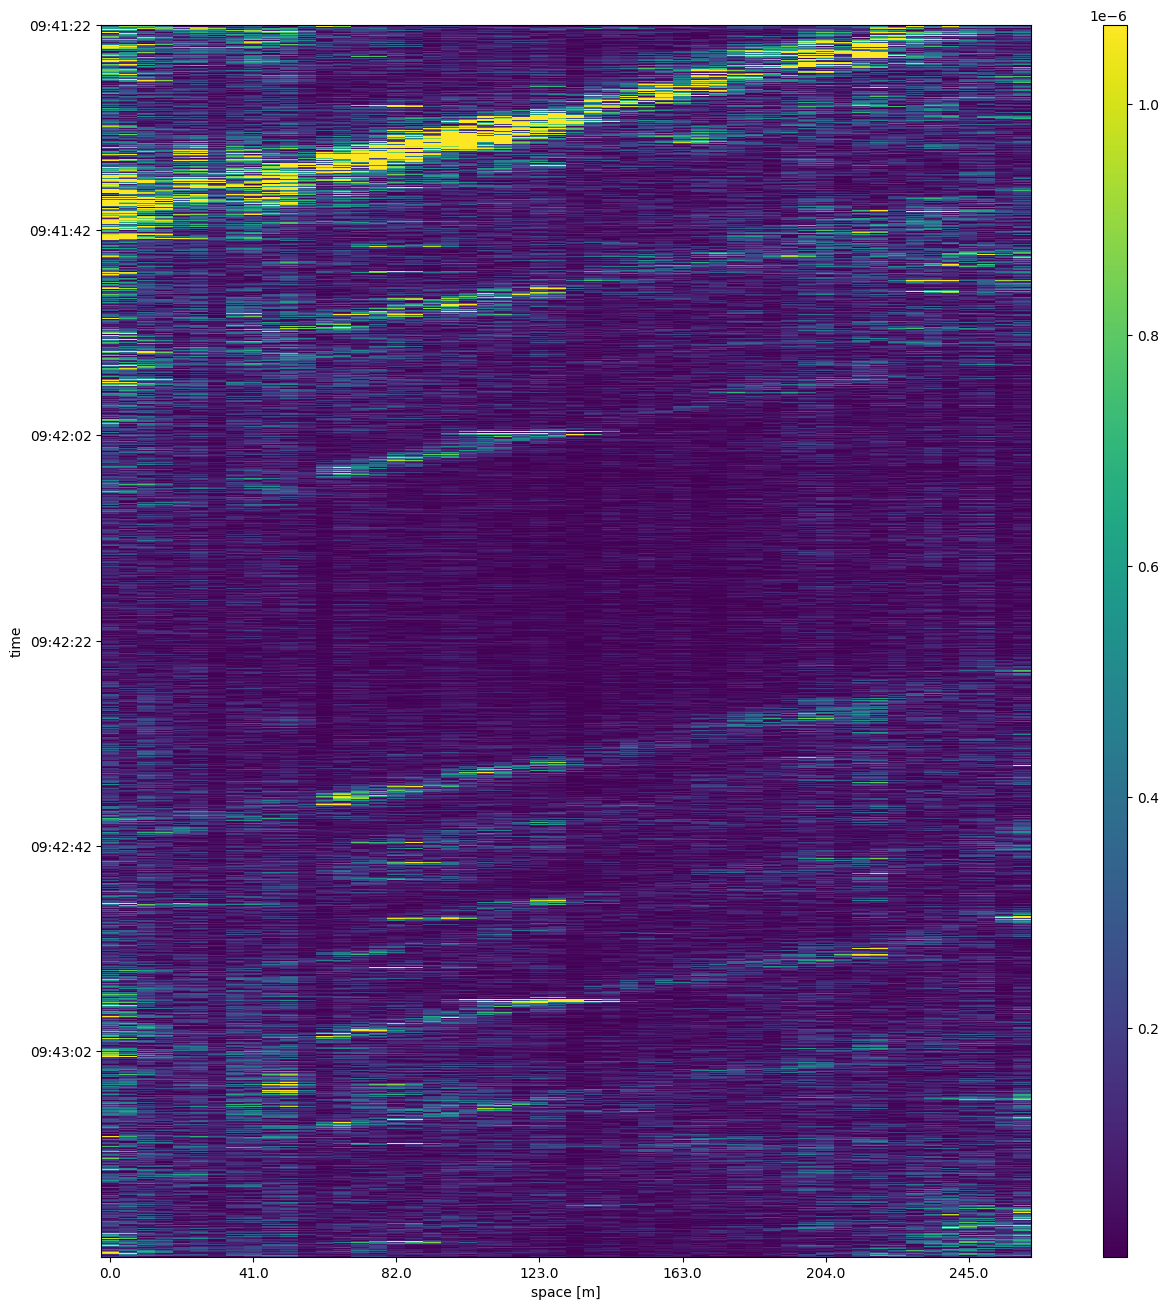

In [25]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

In [26]:
# Store images in memory
images_dict = {}

images_data = [
    (df1.values, 'range1_090422-090612.png'),
    (df2.values, 'range2_091152-091342.png'),
    (df3.values, 'range3_094122-094312.png')
]

for data, filename in images_data:
    low, high = np.percentile(data, [3, 99])
    norm = Normalize(vmin=low, vmax=high, clip=True)
    data_normalized = norm(data)
    
    cmap = plt.cm.viridis
    img_colored = (cmap(data_normalized)[:, :, :3] * 255).astype(np.uint8)
    img_colored_bgr = cv2.cvtColor(img_colored, cv2.COLOR_RGB2BGR)
    
    new_height = 1600
    new_width = int(new_height * 12 / 16)
    img_resized = cv2.resize(img_colored_bgr, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    

    # Store in dictionary    print(f'✓ {filename}: {img_resized.shape}')
    images_dict[filename] = img_resized

## FFT Analysis

This section performs Fast Fourier Transform (FFT) analysis on the generated images to visualize frequency components in each RGB channel. This helps identify periodic patterns and noise characteristics in the DAS data visualization.

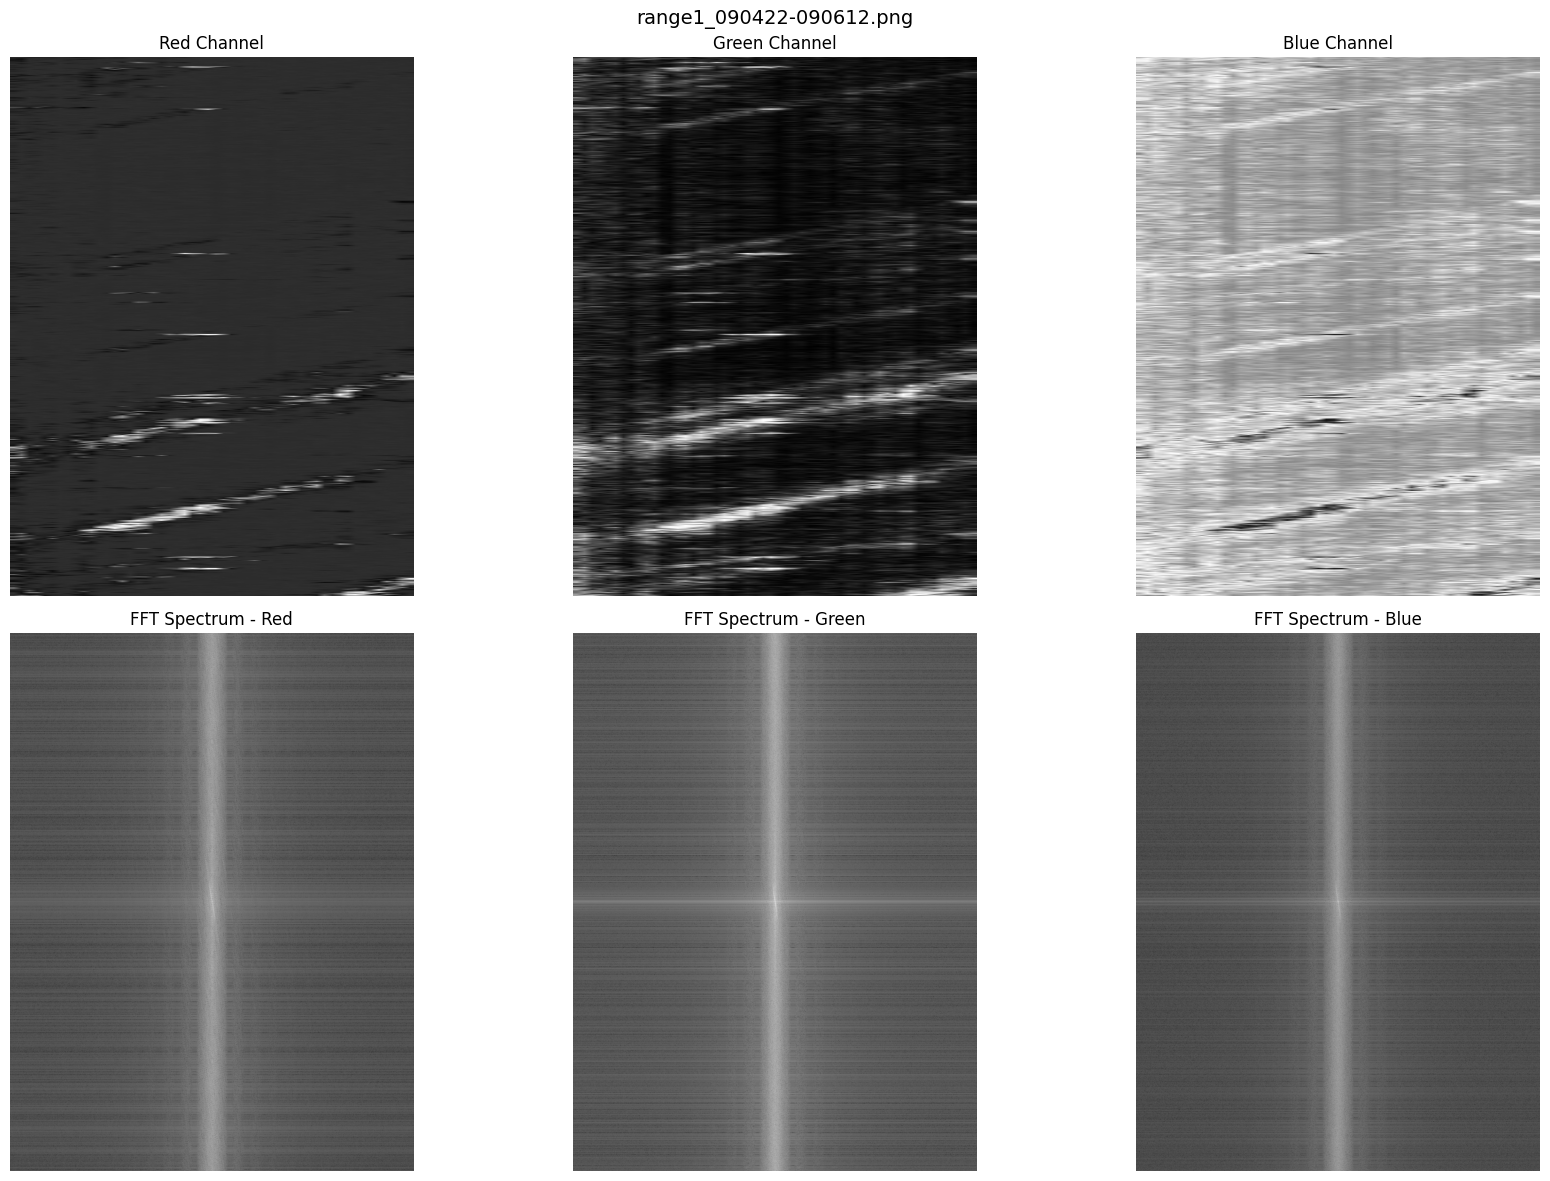

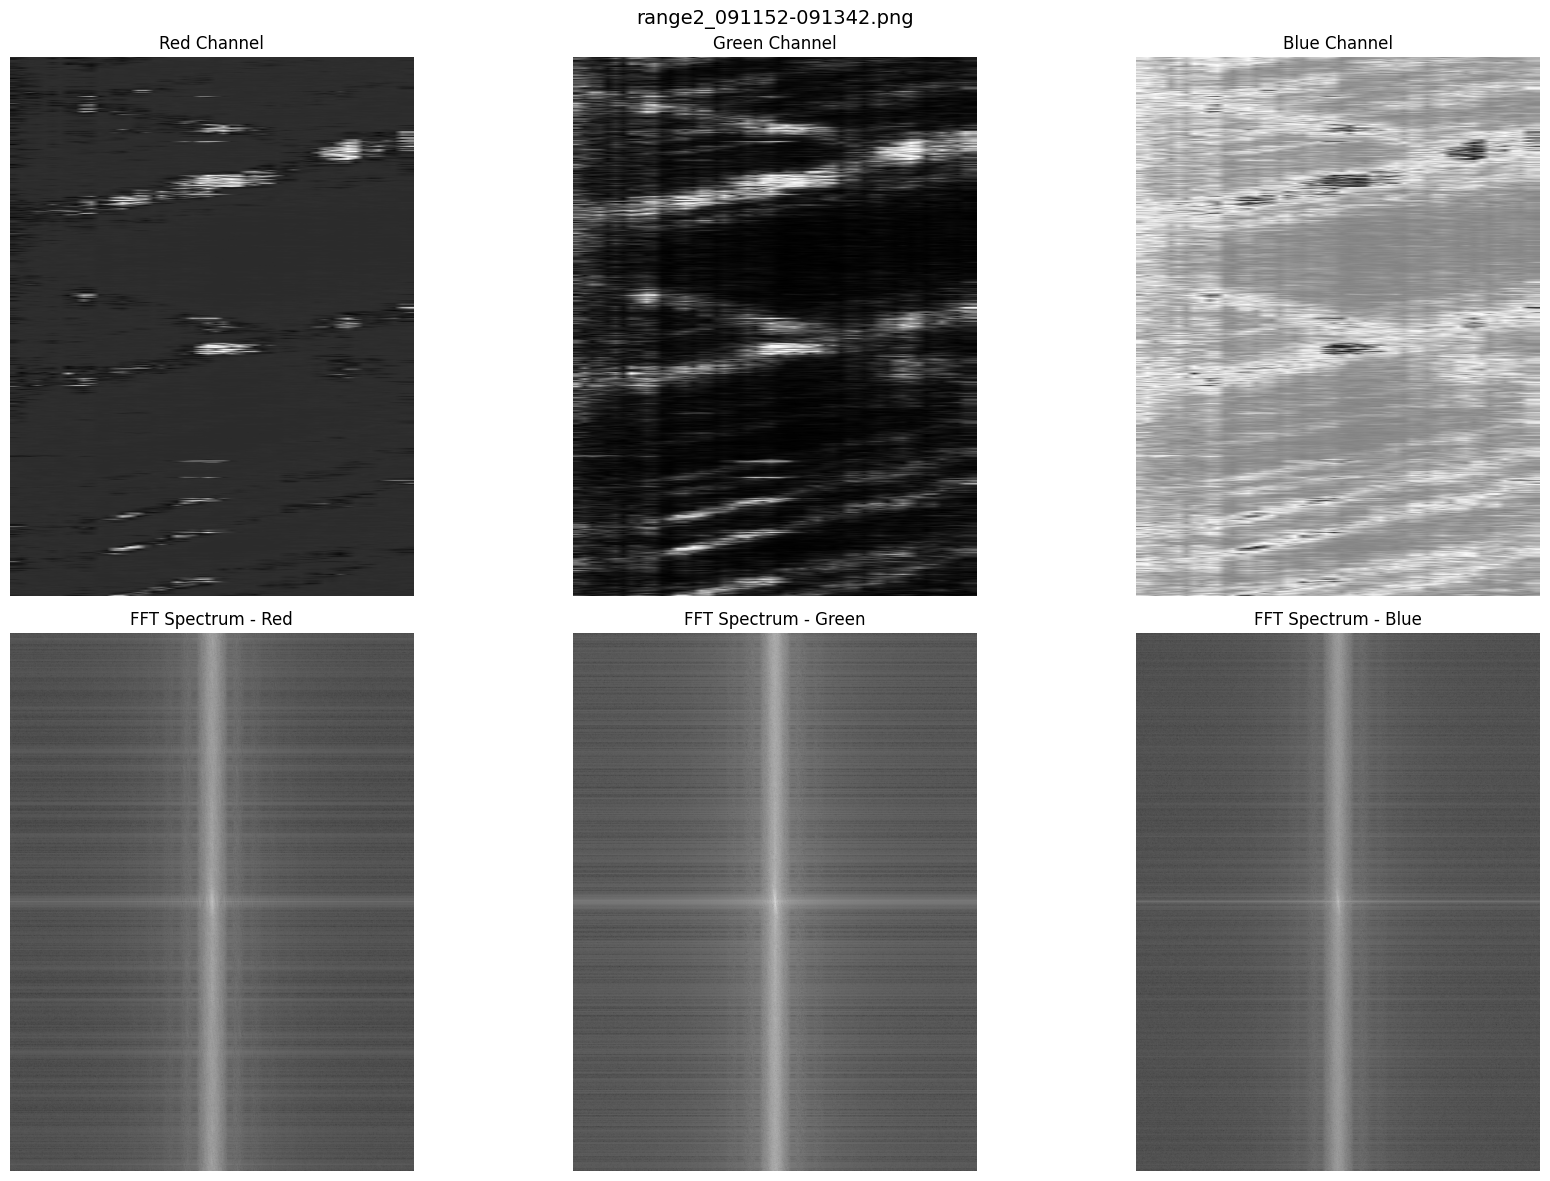

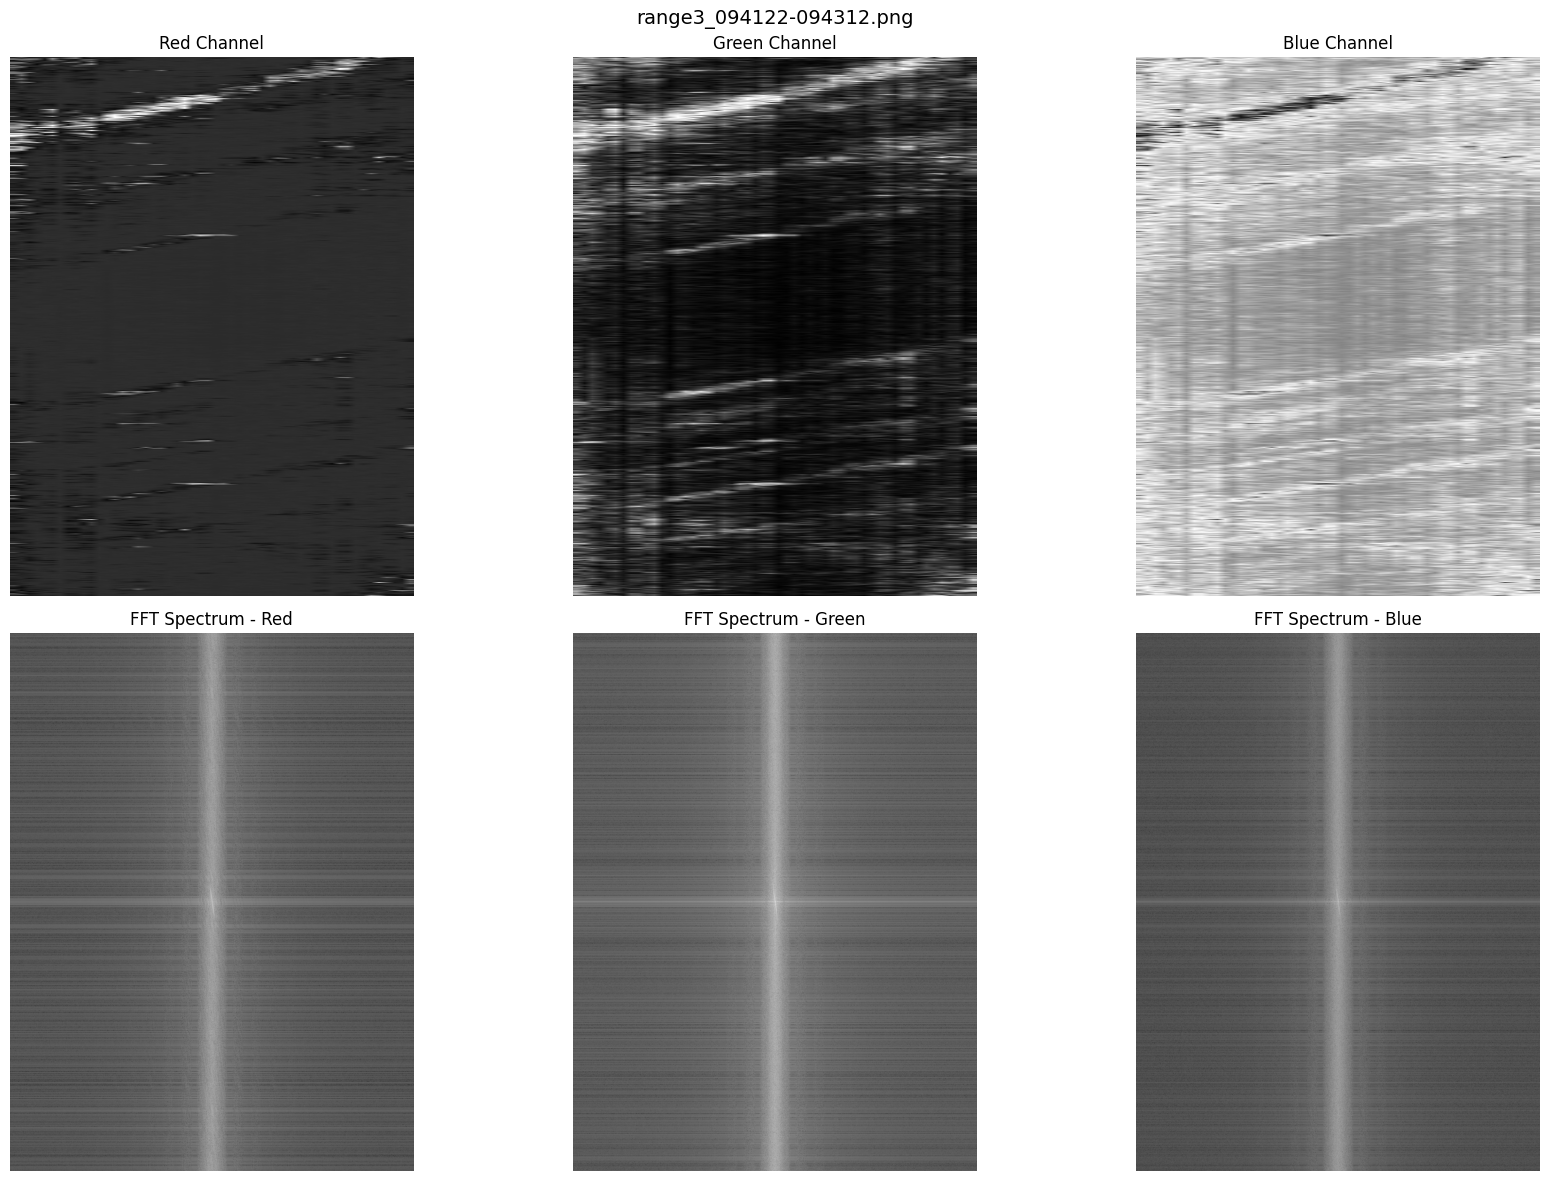

In [27]:
for filename, img in images_dict.items():
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fft_channels = []
    magnitude_spectrums = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)
        magnitude_spectrums.append(magnitude)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    channel_names = ['Red', 'Green', 'Blue']
    for i in range(3):
        axes[0, i].imshow(img_rgb[:, :, i], cmap='gray')
        axes[0, i].set_title(f'{channel_names[i]} Channel')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(magnitude_spectrums[i], cmap='gray')
        axes[1, i].set_title(f'FFT Spectrum - {channel_names[i]}')
        axes[1, i].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()

### **FFT per DAS channel**

This section computes the FFT directly on the DAS signal channels to analyze the frequency spectrum of vehicle vibrations.


In [28]:
def plot_graph(plot_function, figsize=(8,4), title=None, x_label=None, y_label=None, 
               grid=True, tight=True, legend=False):
    plt.figure(figsize=figsize)
    plot_function()
    
    if title is not None:
        plt.title(title)
    
    if x_label is not None:
        plt.xlabel(x_label)
    
    if y_label is not None:
        plt.ylabel(y_label)
    
    plt.grid(grid)
    
    if (tight):
        plt.tight_layout()
    
    if (legend):
        plt.legend()
        
    plt.show()

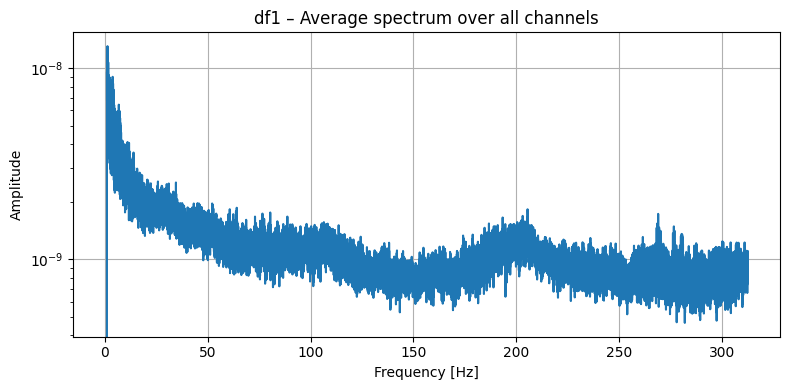

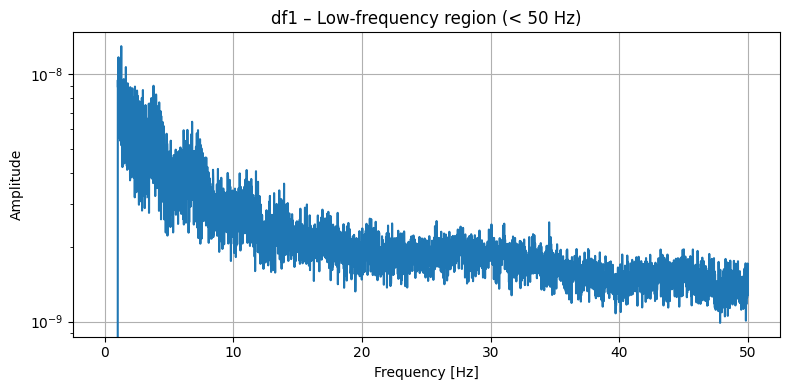

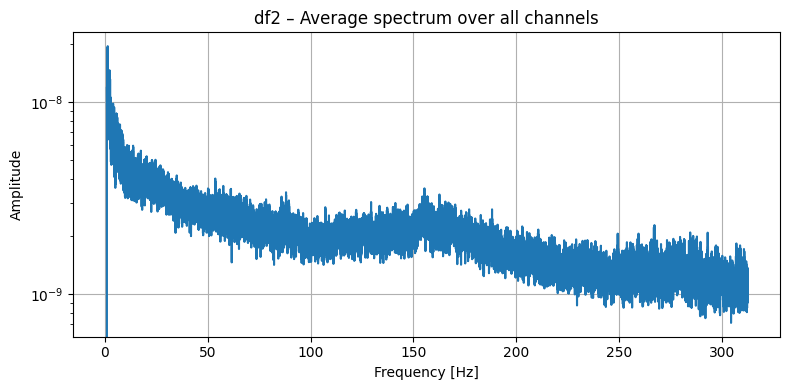

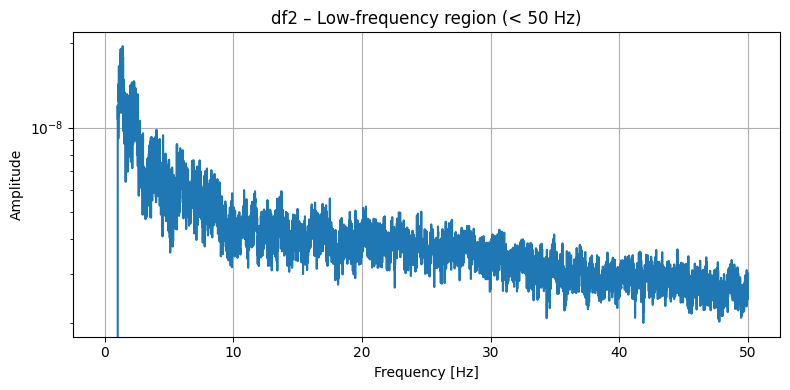

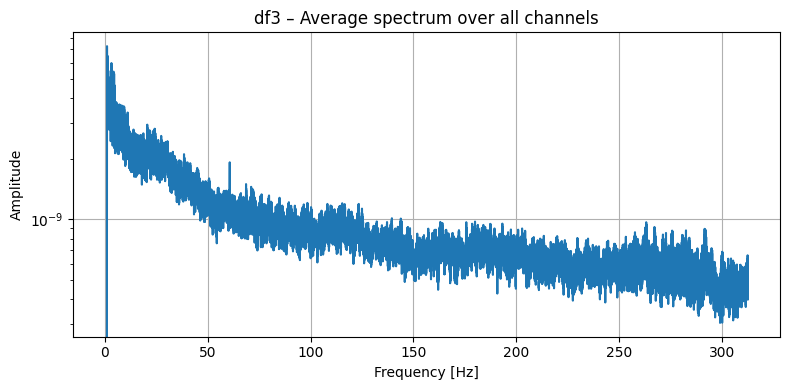

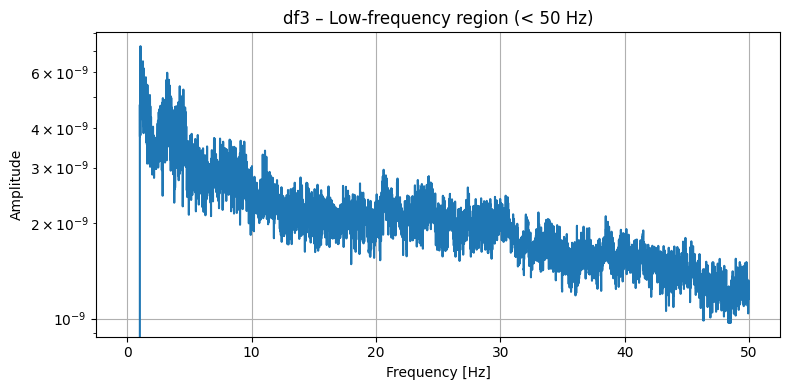

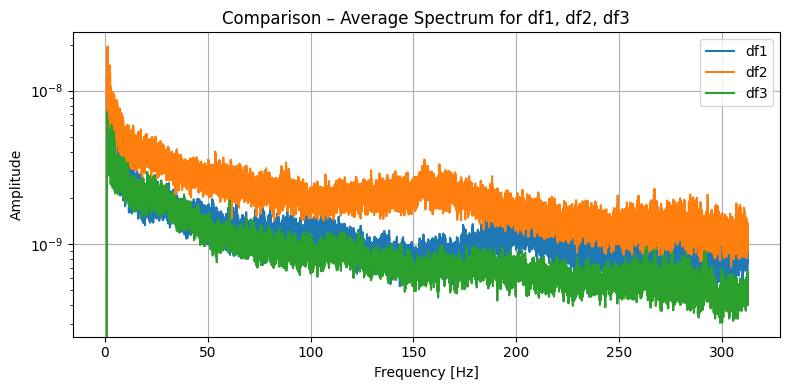

In [29]:
def compute_fft_for_segment(df, f_low = 0, dt=dt):
    data = df.values.astype(np.float64)
    T, C = data.shape
    
    # remove offset
    data -= data.mean(axis=0, keepdims=True)
    
    fft_vals = np.fft.rfft(data, axis=0)
    freqs = np.fft.rfftfreq(T, d=dt)
    
    mask = freqs >= f_low
    
    fft_vals_filtered = fft_vals.copy()
    fft_vals_filtered[~mask, :] = 0.0

    filtered_signal = np.fft.irfft(fft_vals_filtered, n=T, axis=0)

    fft_mag = np.abs(fft_vals_filtered) / (T / 2.0)

    return freqs, fft_mag, filtered_signal

results = {}

for name, df in [("df1", df1), ("df2", df2), ("df3", df3)]:
    freqs, fft_mag, _ = compute_fft_for_segment(df, f_low=1.0)
    results[name] = (freqs, fft_mag)
    
def plot_avg_spectrum(freqs, fft_mag):
    avg_spectrum = fft_mag.mean(axis=1)
    plt.semilogy(freqs, avg_spectrum)

def plot_avg_spectrum_low(freqs, fft_mag, f_max=50):
    avg_spectrum = fft_mag.mean(axis=1)
    mask = freqs < f_max
    plt.semilogy(freqs[mask], avg_spectrum[mask])
    
for name in ["df1", "df2", "df3"]:
    freqs, fft_mag = results[name]

    plot_graph(
        lambda: plot_avg_spectrum(freqs, fft_mag),
        title=f"{name} – Average spectrum over all channels",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )

    plot_graph(
        lambda: plot_avg_spectrum_low(freqs, fft_mag, f_max=50),
        title=f"{name} – Low-frequency region (< 50 Hz)",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )
    
plot_graph(
    lambda: [
        plt.semilogy(results[name][0], results[name][1].mean(axis=1), label=name)
        for name in ["df1", "df2", "df3"]
    ] or None,
    title="Comparison – Average Spectrum for df1, df2, df3",
    x_label="Frequency [Hz]",
    y_label="Amplitude",
    legend=True
)

## Image Processing and Vehicle Trajectory Detection

This section processes the space-time diagrams to extract vehicle trajectories and calculate their speeds:

1. **High-pass FFT filtering**: Removes low-frequency components to isolate vehicle trajectory lines
2. **Thresholding**: Keeps only the most intense pixels (87th percentile) to extract clear trajectories
3. **Morphological operations**: Cleans noise and artifacts using erosion/dilation operations
4. **Gap filling**: Connects broken line segments using diagonal and horizontal kernels
5. **Connected components**: Identifies individual trajectory lines in the binary image
6. **Line fitting**: Fits linear equations to each trajectory using polynomial regression
7. **Line merging**: Combines fragmented trajectories based on slope similarity and proximity
8. **Velocity calculation**: Converts pixel coordinates to physical units (meters, seconds) and computes speeds in km/h

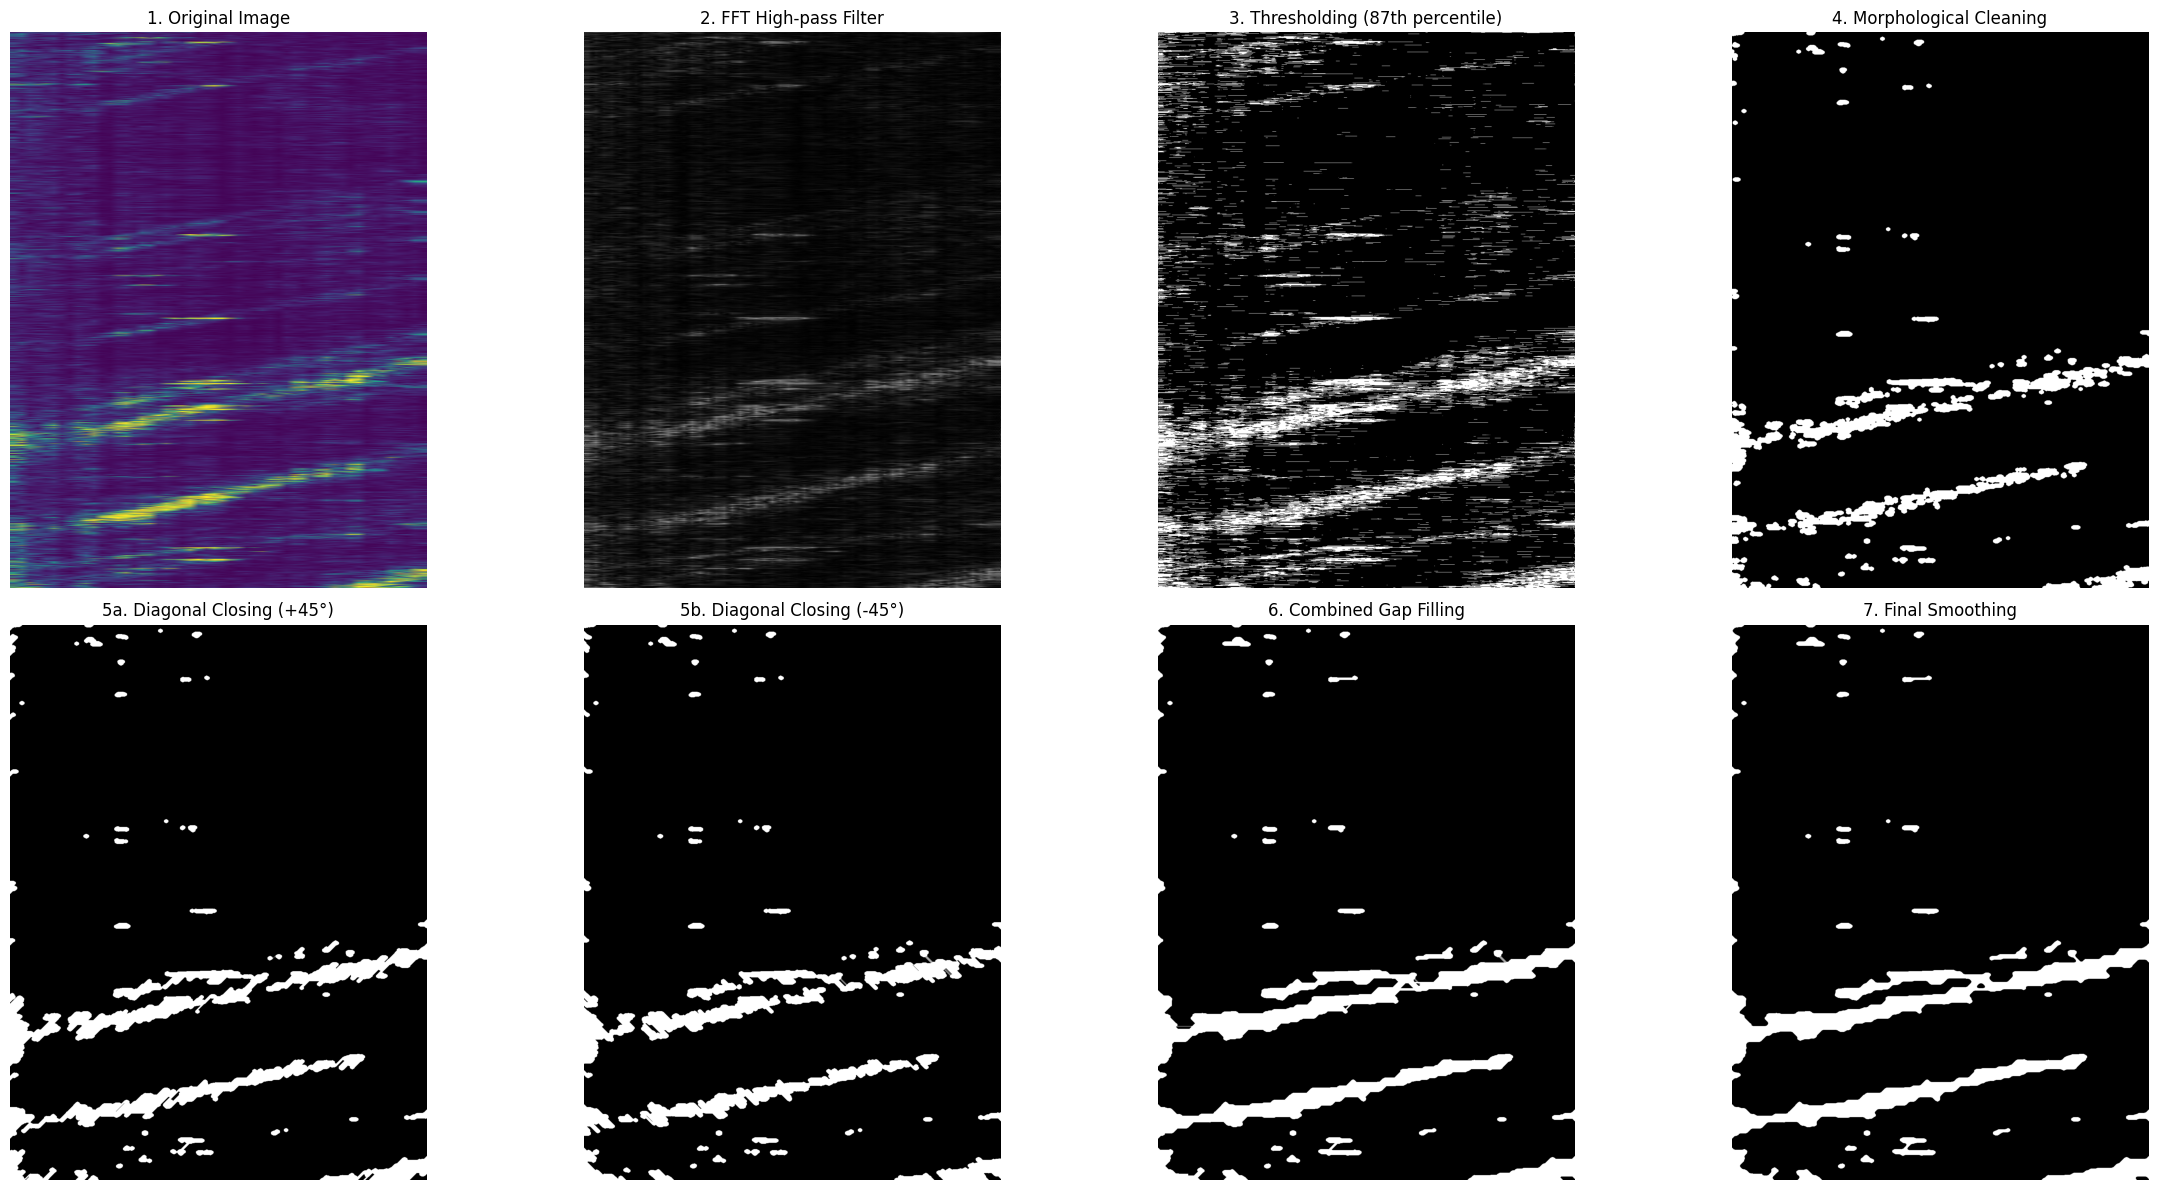

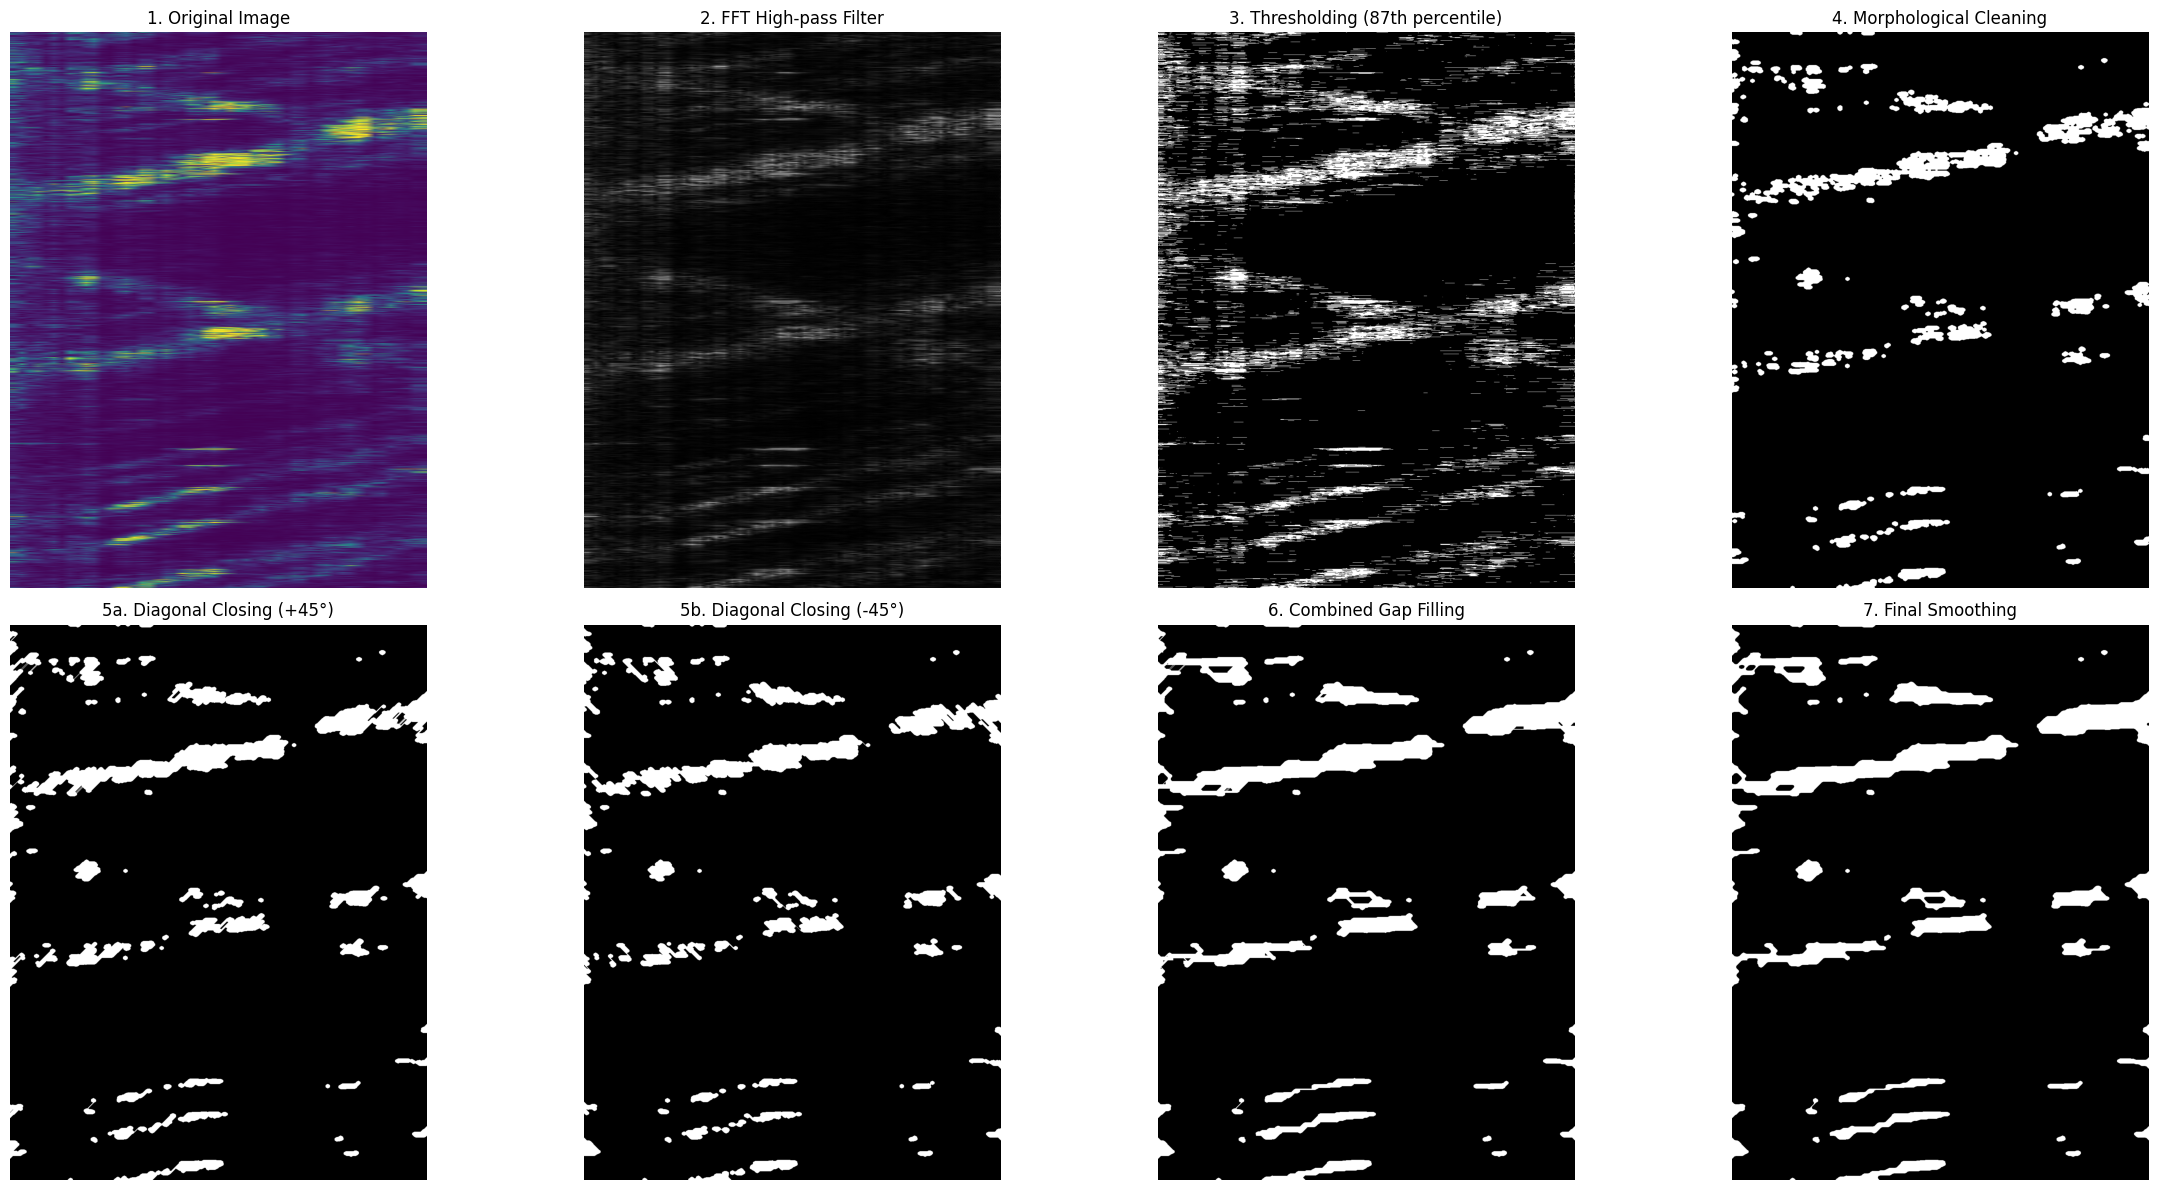

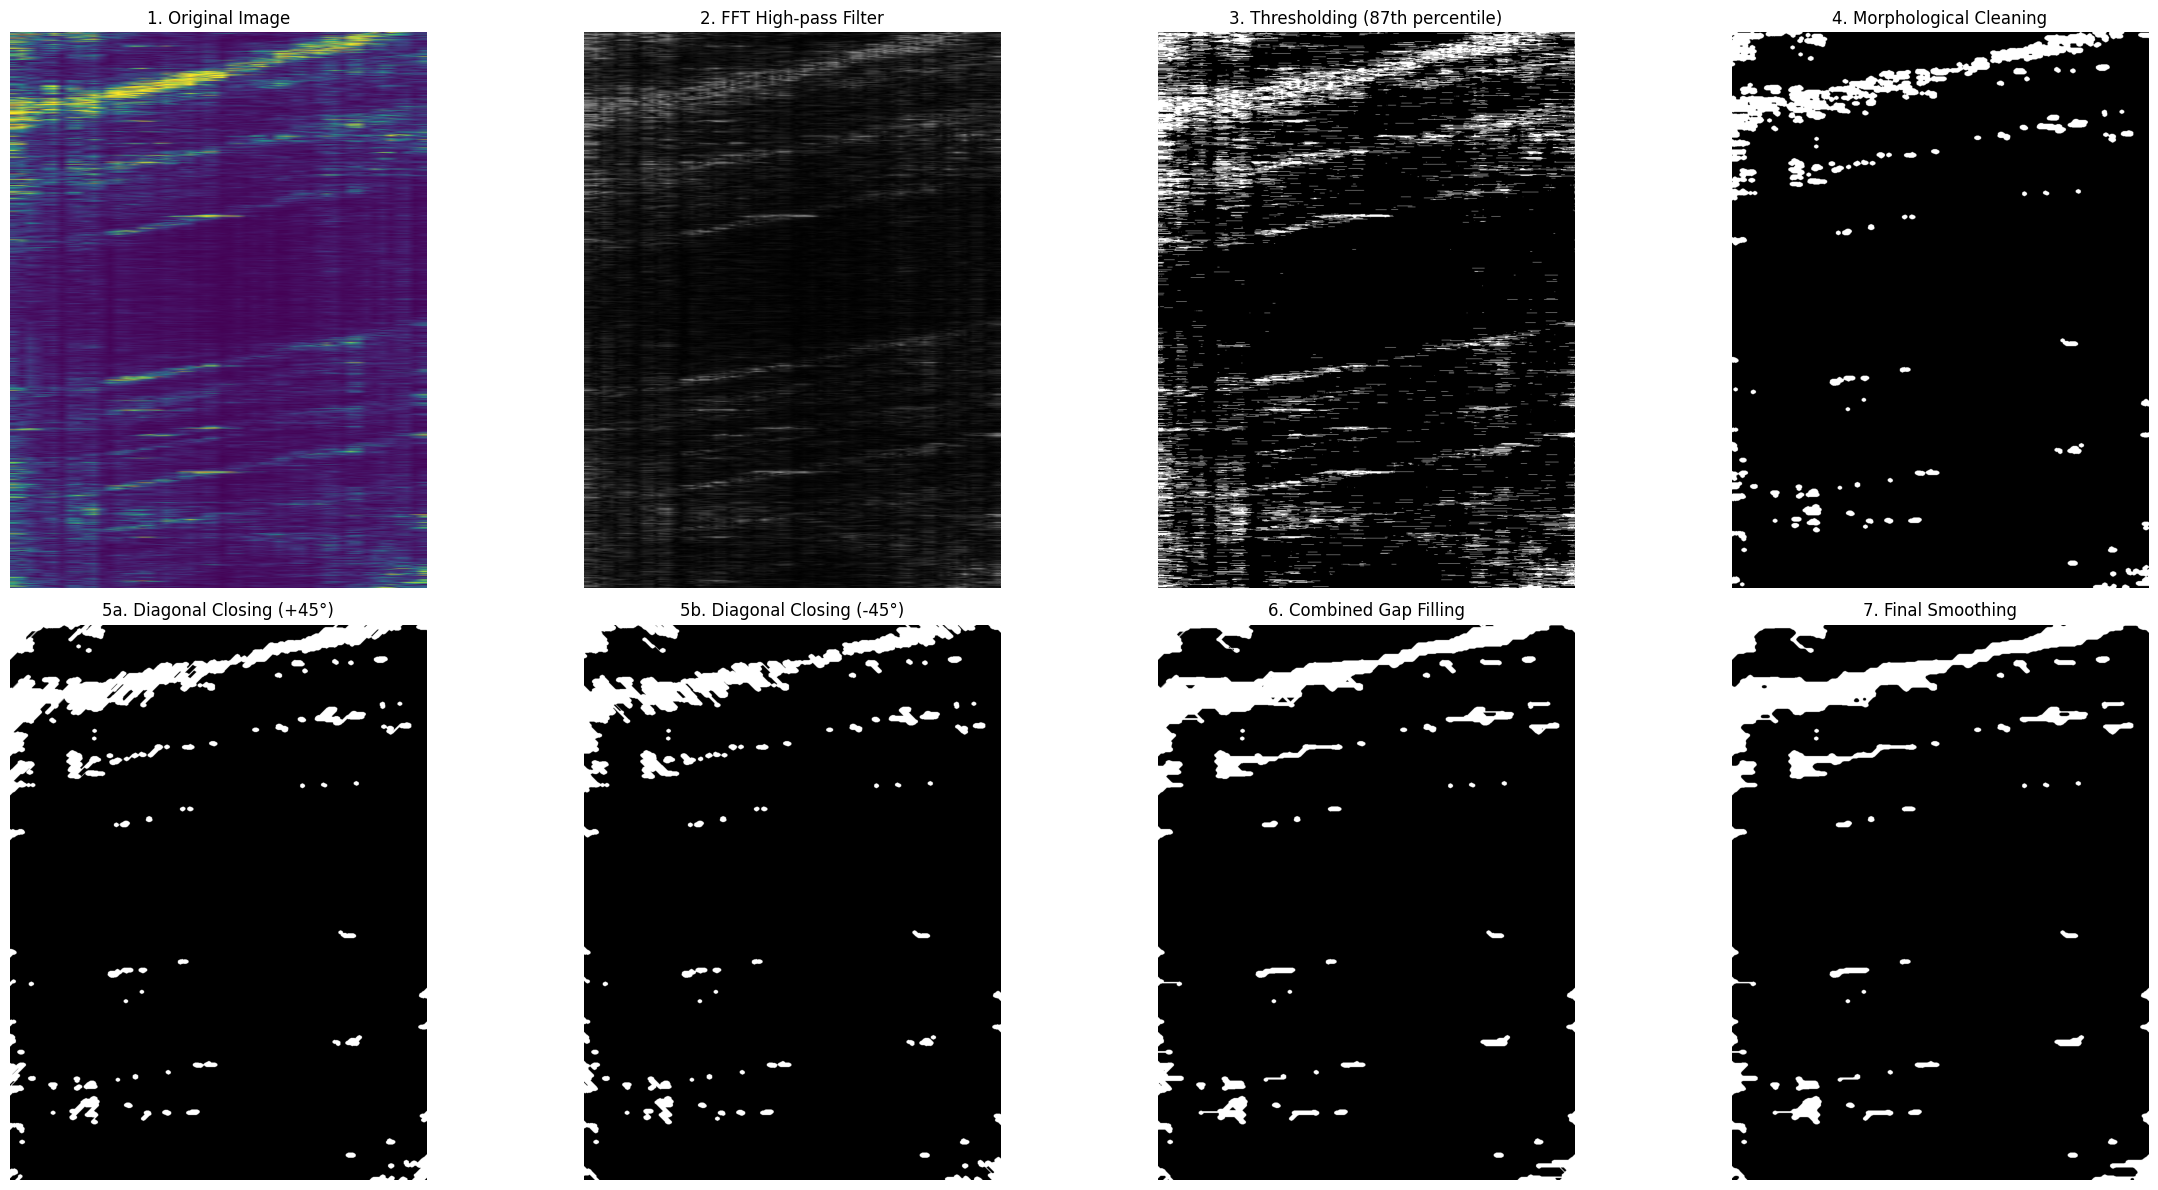

In [30]:
# Store filtered images in memory
filtered_images_dict = {}

for filename, img in images_dict.items():
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    filtered_channels = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        
        # 1. High-pass FFT filter to isolate details
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2

        mask = np.ones((rows, cols, 2), np.uint8)
        radius = min(rows, cols) // 8  # More selective filter
        cv2.circle(mask, (ccol, crow), radius, (0, 0), -1)
        
        fshift_filtered = dft_shift * mask
        
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
        
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        filtered_channels.append(img_back)
    
    img_filtered = np.stack(filtered_channels, axis=2)
    img_filtered_gray = cv2.cvtColor(img_filtered, cv2.COLOR_RGB2GRAY)
    
    # 2. Thresholding to keep only the most intense lines
    threshold_value = np.percentile(img_filtered_gray[img_filtered_gray > 0], 87)
    _, img_binary = cv2.threshold(img_filtered_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    # 3. Morphological operations: close -> open -> close with reinforced cleaning
    struct_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    struct_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    
    # First pass with small kernel to clean small impurities
    img_space_close = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, struct_small)
    img_space_open = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct_large, iterations=2)
    img_cleaned = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct_small)
    
    # 4. FILL GAPS IN LINES
    # Create oriented kernels to connect diagonal lines
    # Kernel for positive diagonal lines (/)
    kernel_diag_pos = np.array([[0, 0, 0, 0, 1],
                                 [0, 0, 0, 1, 0],
                                 [0, 0, 1, 0, 0],
                                 [0, 1, 0, 0, 0],
                                 [1, 0, 0, 0, 0]], dtype=np.uint8)
    
    # Kernel for negative diagonal lines (\)
    kernel_diag_neg = np.array([[1, 0, 0, 0, 0],
                                 [0, 1, 0, 0, 0],
                                 [0, 0, 1, 0, 0],
                                 [0, 0, 0, 1, 0],
                                 [0, 0, 0, 0, 1]], dtype=np.uint8)
    
    # Horizontal kernel to connect nearby points horizontally
    kernel_horiz = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 3))
    
    # Apply closing with diagonal kernels to fill gaps
    img_diag_pos = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_diag_pos, iterations=4)
    img_diag_neg = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_diag_neg, iterations=4)
    img_horiz = cv2.morphologyEx(img_cleaned, cv2.MORPH_CLOSE, kernel_horiz, iterations=3)
    
    # Combine all closings
    img_connected = cv2.bitwise_or(img_diag_pos, img_diag_neg)
    img_connected = cv2.bitwise_or(img_connected, img_horiz)
    
    # Final closing with an elliptical kernel to smooth
    kernel_final = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    img_final = cv2.morphologyEx(img_connected, cv2.MORPH_CLOSE, kernel_final, iterations=1)

    # Display all pipeline stages
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title('1. Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(img_filtered_gray, cmap='gray')
    axes[0, 1].set_title('2. FFT High-pass Filter')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(img_binary, cmap='gray')
    axes[0, 2].set_title('3. Thresholding (87th percentile)')
    axes[0, 2].axis('off')
    
    axes[0, 3].imshow(img_cleaned, cmap='gray')
    axes[0, 3].set_title('4. Morphological Cleaning')
    axes[0, 3].axis('off')
    
    axes[1, 0].imshow(img_diag_pos, cmap='gray')
    axes[1, 0].set_title('5a. Diagonal Closing (+45°)')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(img_diag_neg, cmap='gray')
    axes[1, 1].set_title('5b. Diagonal Closing (-45°)')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(img_connected, cmap='gray')
    axes[1, 2].set_title('6. Combined Gap Filling')
    axes[1, 2].axis('off')
    
    axes[1, 3].imshow(img_final, cmap='gray')
    axes[1, 3].set_title('7. Final Smoothing')
    axes[1, 3].axis('off')
    
    

    # Store filtered image in dictionary
    plt.tight_layout()

    filtered_images_dict[filename] = img_final
    plt.show()


range1_090422-090612.png:


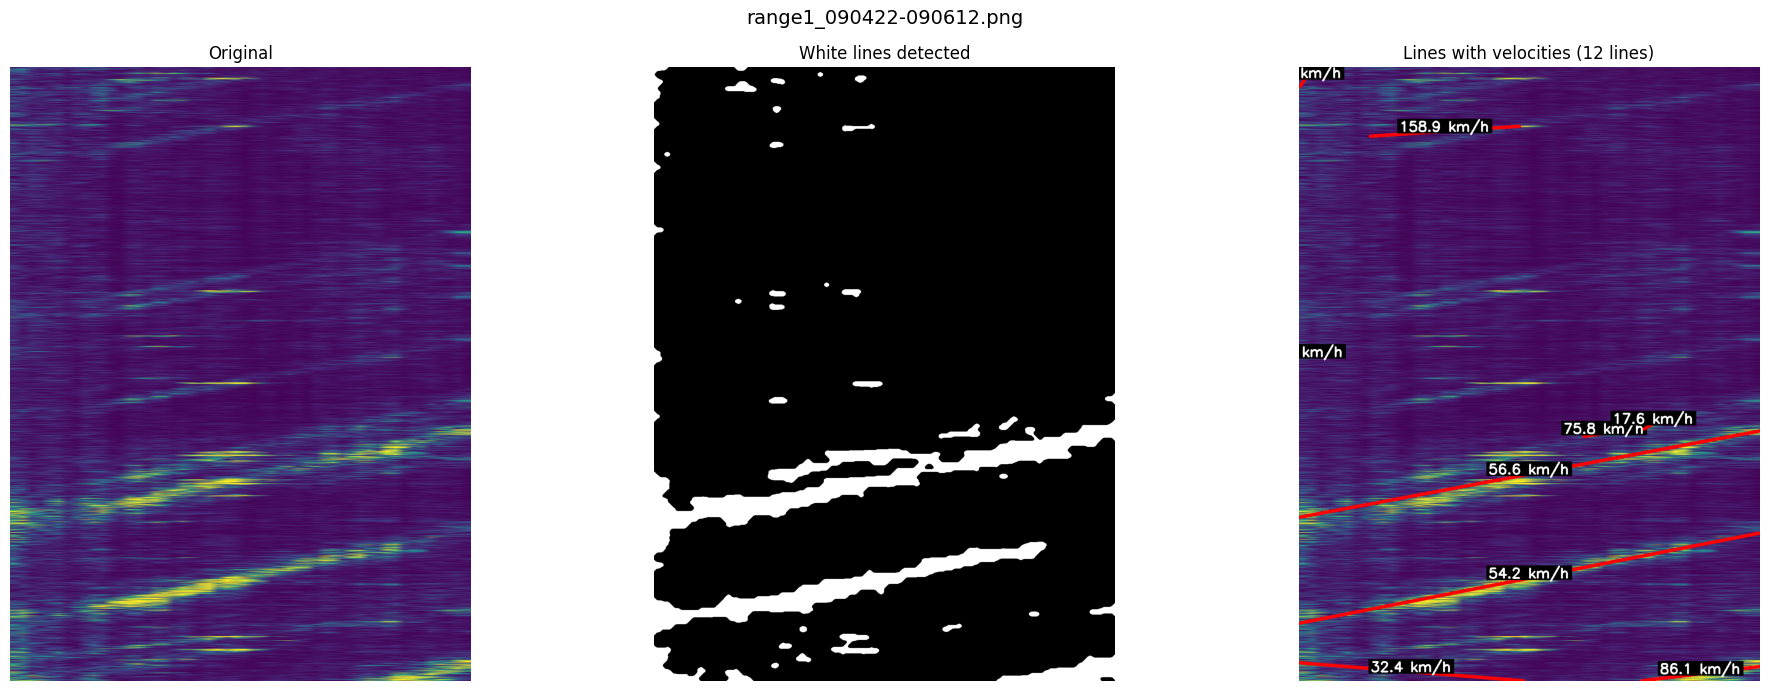

✓ Saved: lines_range1_090422-090612.png

range2_091152-091342.png:


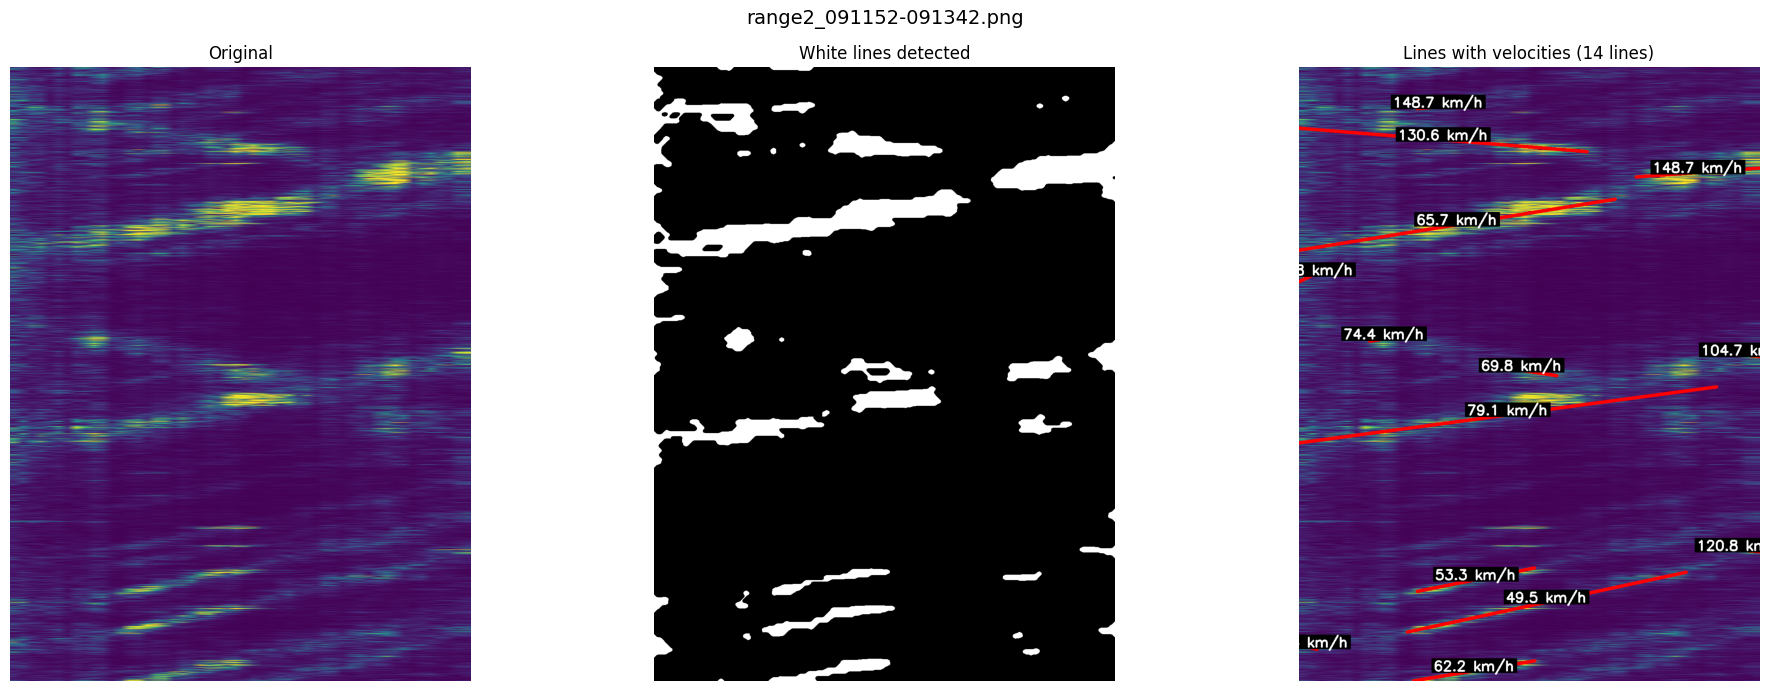

✓ Saved: lines_range2_091152-091342.png

range3_094122-094312.png:


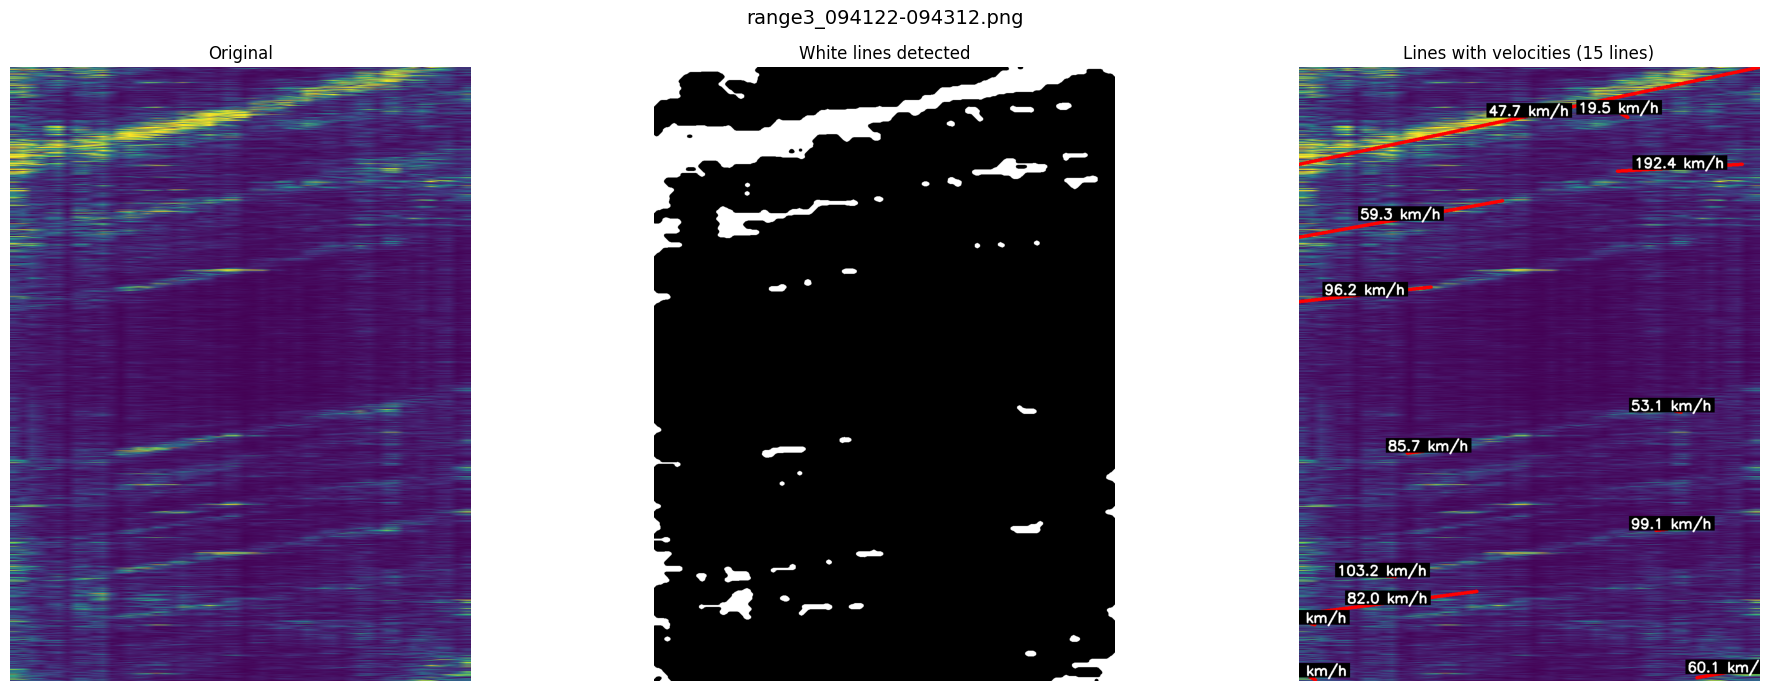

✓ Saved: lines_range3_094122-094312.png


In [ ]:
for filename, img_original in images_dict.items():
    # Use images from memory
    img_filtered = filtered_images_dict[filename]
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    
    # Image dimensions
    img_height, img_width = img_rgb.shape[:2]
    
    # Find all white regions (connected components)
    num_labels, labels, component_stats, centroids = cv2.connectedComponentsWithStats(img_filtered, connectivity=8)
    
    # Create a copy to draw lines on
    img_with_lines = img_rgb.copy()
    
    # Calculate minimum area threshold
    areas = [component_stats[i, cv2.CC_STAT_AREA] for i in range(1, num_labels)]
    if len(areas) > 0:
        median_area = np.median(areas)
        min_area_threshold = median_area * 1.2
    else:
        min_area_threshold = 0
    
    # Collect all line segments
    lines = []
    
    for i in range(1, num_labels):
        area = component_stats[i, cv2.CC_STAT_AREA]
        if area < min_area_threshold:
            continue
        
        points = np.column_stack(np.where(labels == i))
        if len(points) < 2:
            continue
        
        y_coords = points[:, 0]
        x_coords = points[:, 1]
        
        try:
            coeffs = np.polyfit(x_coords, y_coords, 1)
            slope = coeffs[0]
            intercept = coeffs[1]
            
            x_min, x_max = int(x_coords.min()), int(x_coords.max())
            y_min = int(slope * x_min + intercept)
            y_max = int(slope * x_max + intercept)
            
            lines.append({
                'slope': slope,
                'intercept': intercept,
                'x_min': x_min,
                'x_max': x_max,
                'y_min': y_min,
                'y_max': y_max
            })
        except:
            continue
    
    # Calculate size for each line
    for line in lines:
        length = np.sqrt((line['x_max'] - line['x_min'])**2 + (line['y_max'] - line['y_min'])**2)
        line['area'] = length
    
    # Sort by size (biggest first)
    lines_sorted = sorted(lines, key=lambda x: x['area'], reverse=True)
    
    # Try to merge lines together
    keep_merging = True
    while keep_merging and len(lines_sorted) > 1:
        keep_merging = False
        used_indices = set()
        result = []
        
        for i in range(len(lines_sorted)):
            if i in used_indices:
                continue
            
            line1 = lines_sorted[i]
            match_found = None
            best_dist = float('inf')
            
            # Look for a smaller line to merge with
            for j in range(len(lines_sorted)):
                if i == j or j in used_indices:
                    continue
                
                line2 = lines_sorted[j]
                
                # Only merge smaller lines
                if line2['area'] >= line1['area']:
                    continue
                
                # Check if slopes are same direction
                if (line1['slope'] * line2['slope']) < 0:
                    continue
                
                # Check if slopes are similar
                if abs(line1['slope'] - line2['slope']) > 0.3:
                    continue
                
                # Calculate horizontal distance
                d1 = abs(line1['x_max'] - line2['x_min'])
                d2 = abs(line2['x_max'] - line1['x_min'])
                x_dist = min(d1, d2)
                
                if x_dist > 300:
                    continue
                
                # Check vertical distance
                mid1_x = (line1['x_min'] + line1['x_max']) / 2
                mid2_x = (line2['x_min'] + line2['x_max']) / 2
                y1 = line1['slope'] * mid1_x + line1['intercept']
                y2 = line2['slope'] * mid2_x + line2['intercept']
                y_dist = abs(y1 - y2)
                
                if y_dist > 120:
                    continue
                
                # Calculate total distance
                total = x_dist + y_dist
                
                if total < best_dist:
                    best_dist = total
                    match_found = j
            
            # Do the merge
            if match_found is not None:
                line2 = lines_sorted[match_found]
                
                # Keep the angle of the bigger line
                new_x_min = min(line1['x_min'], line2['x_min'])
                new_x_max = max(line1['x_max'], line2['x_max'])
                
                new_line = {
                    'slope': line1['slope'],
                    'intercept': line1['intercept'],
                    'x_min': new_x_min,
                    'x_max': new_x_max,
                    'y_min': int(line1['slope'] * new_x_min + line1['intercept']),
                    'y_max': int(line1['slope'] * new_x_max + line1['intercept'])
                }
                
                # Recalculate size
                new_length = np.sqrt((new_line['x_max'] - new_line['x_min'])**2 + 
                                    (new_line['y_max'] - new_line['y_min'])**2)
                new_line['area'] = new_length
                
                result.append(new_line)
                used_indices.add(i)
                used_indices.add(match_found)
                keep_merging = True
            else:
                result.append(line1)
                used_indices.add(i)
        
        lines_sorted = result
    
    lines = lines_sorted
    
    # Draw lines and calculate velocities
    print(f'\n{filename}:')
    for idx, line in enumerate(lines):
        y_min = max(0, min(img_rgb.shape[0] - 1, line['y_min']))
        y_max = max(0, min(img_rgb.shape[0] - 1, line['y_max']))
        
        # Calculate velocity
        dx_pixels = line['x_max'] - line['x_min']
        dy_pixels = line['y_max'] - line['y_min']
        
        # Convert to real units
        space_per_pixel = (len(df1.columns) * dx) / img_width
        time_per_pixel = (len(df1.index) * dt) / img_height
        
        distance = dx_pixels * space_per_pixel
        time = dy_pixels * time_per_pixel
        
        # Calculate speed
        if abs(time) > 1e-6:
            speed = distance / time
        else:
            speed = 0
        
        # Convert to km/h
        speed_kmh = abs(speed * 3.6)
        
        # Filter out bad velocities
        if speed_kmh > 200 or speed_kmh < 0.1:
            continue
        
        # Draw the line
        cv2.line(img_with_lines, (line['x_min'], y_min), (line['x_max'], y_max), (255, 0, 0), 8)
        
        # Add text with velocity
        center_x = (line['x_min'] + line['x_max']) // 2
        center_y = (y_min + y_max) // 2
        
        text = f'{speed_kmh:.1f} km/h'
        font = cv2.FONT_HERSHEY_SIMPLEX
        size = 1.2
        thickness = 3
        
        (w, h), _ = cv2.getTextSize(text, font, size, thickness)
        
        # Background rectangle
        cv2.rectangle(img_with_lines, 
                     (center_x - w // 2 - 5, center_y - h - 5),
                     (center_x + w // 2 + 5, center_y + 5),
                     (0, 0, 0), -1)
    
        # Text
        cv2.putText(img_with_lines, text,
                   (center_x - w // 2, center_y),
                   font, size, (255, 255, 255), thickness)
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(img_filtered, cmap='gray')
    axes[1].set_title('White lines detected')
    axes[1].axis('off')
    
    axes[2].imshow(img_with_lines)
    axes[2].set_title(f'Lines with velocities ({len(lines)} lines)')
    axes[2].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()